<a href="https://colab.research.google.com/github/priyanshubhaskar1/.-Walmart-Sales-Data-Analysis-Using-MySQL/blob/main/Predict_Osteoporosis_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OSTEOPOROSIS RISK PREDICTION

Osteoporosis is when your bones become weak and thin, kind of like how chalk breaks easily when you try to write with it.

Imagine your bones are like building blocks. When you're little, your body keeps adding blocks to make your bones strong. But as some people get older, their body starts to take away blocks faster than it adds them.

So instead of strong bones like a hard toy, their bones become more like a brittle cookie—easy to crack or break if they fall or bump into something.

That’s what osteoporosis is—bones getting weak and easy to break.

🔍 Explanation of Each Attribute (Like for a Beginner)


In [3]:
#import libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the dataset
df = pd.read_csv('/content/osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


# 1.  Data Preprocessing

In [ ]:
# shape of data
df.shape

(1958, 16)

In [ ]:
# check info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

#### Observation
1. few columns have missing values

In [ ]:
# check for missing values
cols_with_misssing_values = df.columns[df.isnull().any()]
print('Missing Values columns: ', cols_with_misssing_values)

Missing Values columns:  Index(['Alcohol Consumption', 'Medical Conditions', 'Medications'], dtype='object')


In [ ]:
# missing value percentage
print("% of Missing values")
for col in cols_with_misssing_values:
  print(col, " - ", (df[col].isnull().sum())/df.shape[0] *100, "%")

% of Missing values
Alcohol Consumption  -  50.45965270684371 %
Medical Conditions  -  33.04392236976506 %
Medications  -  50.30643513789581 %


In [ ]:
df.fillna("None", inplace=True)
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,None,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,None,Rheumatoid Arthritis,None,Yes,1


In [ ]:
df.isnull().sum()

,0
Id,0
Age,0
Gender,0
Hormonal Changes,0
Family History,0
Race/Ethnicity,0
Body Weight,0
Calcium Intake,0
Vitamin D Intake,0
Physical Activity,0


In [ ]:
df = df.drop('Id', axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1958 non-null   int64 
 1   Gender               1958 non-null   object
 2   Hormonal Changes     1958 non-null   object
 3   Family History       1958 non-null   object
 4   Race/Ethnicity       1958 non-null   object
 5   Body Weight          1958 non-null   object
 6   Calcium Intake       1958 non-null   object
 7   Vitamin D Intake     1958 non-null   object
 8   Physical Activity    1958 non-null   object
 9   Smoking              1958 non-null   object
 10  Alcohol Consumption  1958 non-null   object
 11  Medical Conditions   1958 non-null   object
 12  Medications          1958 non-null   object
 13  Prior Fractures      1958 non-null   object
 14  Osteoporosis         1958 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 229.6+ KB


In [ ]:

# cat_columns = df.select_dtypes(include=['object']).columns
# cat_columns

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num_features), num_features))
print('\nWe have {} categorical features : {}'.format(len(cat_features), cat_features))

We have 2 numerical features : ['Age', 'Osteoporosis']

We have 13 categorical features : ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


In [ ]:
for feature in cat_features:
  print(f"\nCategories in {feature} variable:  ", end= " ")
  print(df[feature].unique())
  print(df[feature].value_counts())


Categories in Gender variable:   ['Female' 'Male']
Gender
Male      992
Female    966
Name: count, dtype: int64

Categories in Hormonal Changes variable:   ['Normal' 'Postmenopausal']
Hormonal Changes
Normal            981
Postmenopausal    977
Name: count, dtype: int64

Categories in Family History variable:   ['Yes' 'No']
Family History
No     998
Yes    960
Name: count, dtype: int64

Categories in Race/Ethnicity variable:   ['Asian' 'Caucasian' 'African American']
Race/Ethnicity
African American    681
Caucasian           646
Asian               631
Name: count, dtype: int64

Categories in Body Weight variable:   ['Underweight' 'Normal']
Body Weight
Normal         1027
Underweight     931
Name: count, dtype: int64

Categories in Calcium Intake variable:   ['Low' 'Adequate']
Calcium Intake
Low         1004
Adequate     954
Name: count, dtype: int64

Categories in Vitamin D Intake variable:   ['Sufficient' 'Insufficient']
Vitamin D Intake
Sufficient      1011
Insufficient     947
Nam

In [ ]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


#### Observation
1. We have replaced Null values with "NONE".
2. there are 13 categorical and 2 nuemrical features.

# Explore Data (Visualisation)

EDA - Exploratory Data Analysis

Text(0.5, 1.0, 'Osteporosis Distribution')

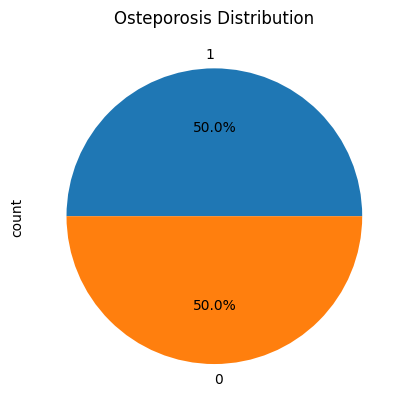

In [ ]:
# Distribution of Target Variable
df['Osteoporosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Osteporosis Distribution')

#### Observation
We havea perfectly balanced dataset ie., data set is not biased

In [ ]:
df.head(2)

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,None,None,None,Yes,1


<Axes: xlabel='Age', ylabel='Count'>

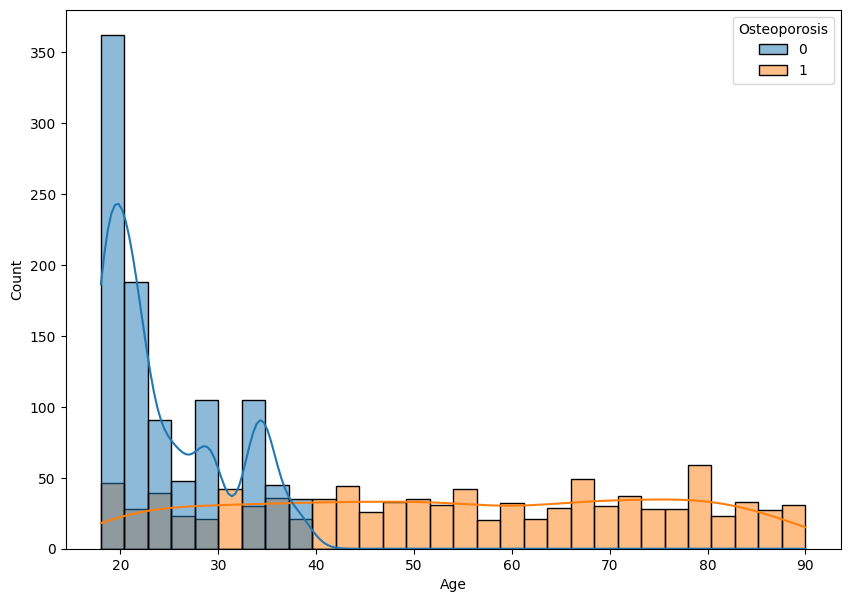

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(data = df, x = 'Age', bins = 30, kde=True, hue='Osteoporosis')

Text(0, 0.5, 'Osteoporosis by Age')

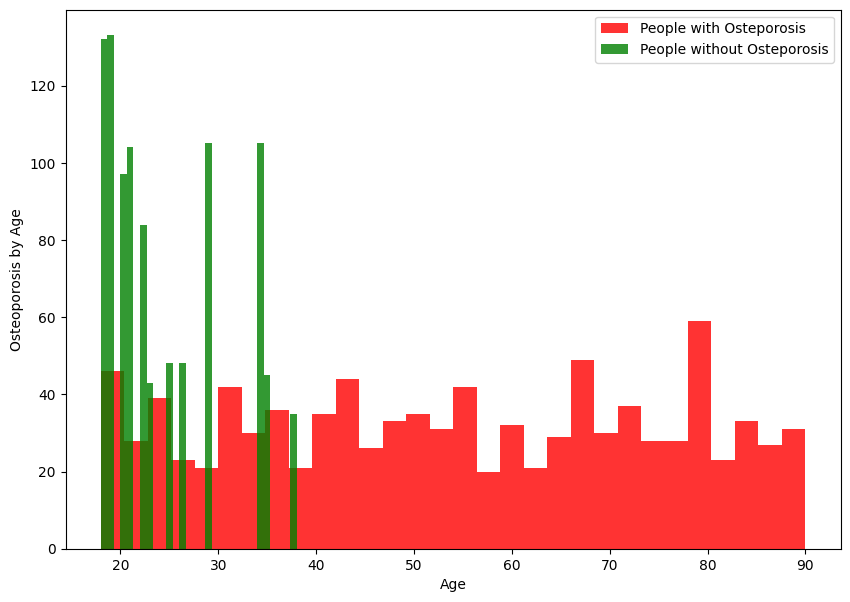

In [ ]:
plt.figure(figsize = (10,7))

df[df['Osteoporosis']==1]['Age'].plot.hist(bins=30, alpha =0.8, color='red', label = 'People with Osteporosis')
df[df['Osteoporosis']==0]['Age'].plot.hist(bins=30, alpha =0.8, color='green', label = 'People without Osteporosis')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Osteoporosis by Age')

#### Observation
People with higher age (age>40) have higher risk of having Osteoporosis as comaprison to lower age(age<40)

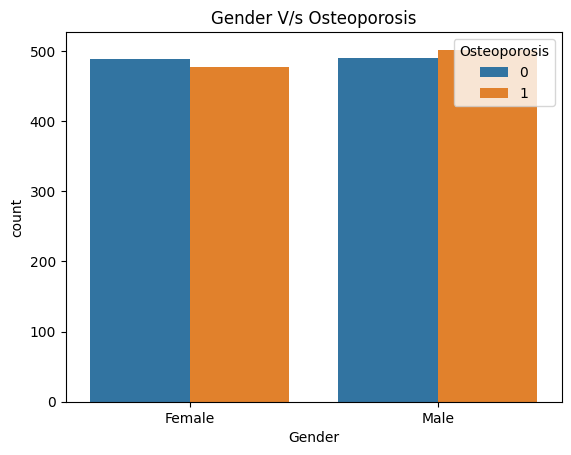

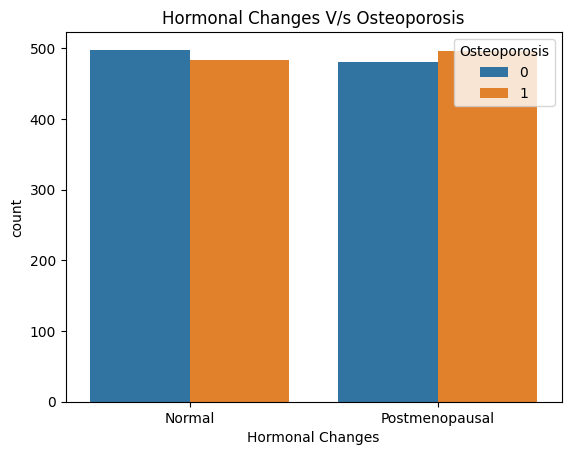

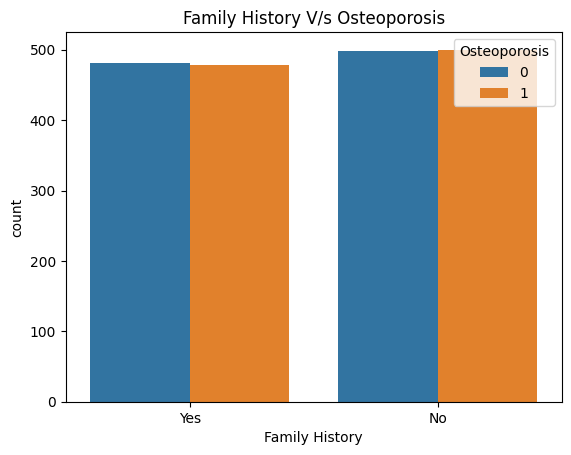

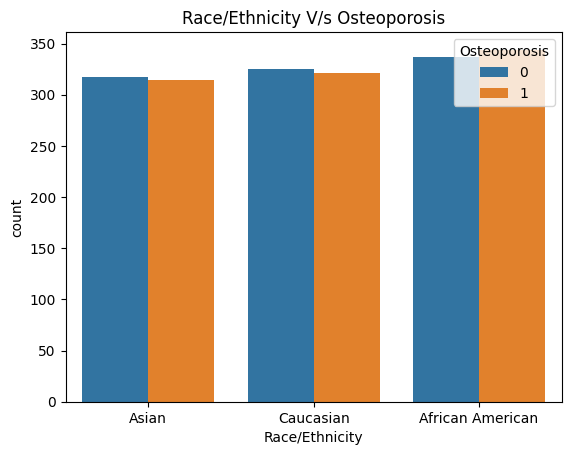

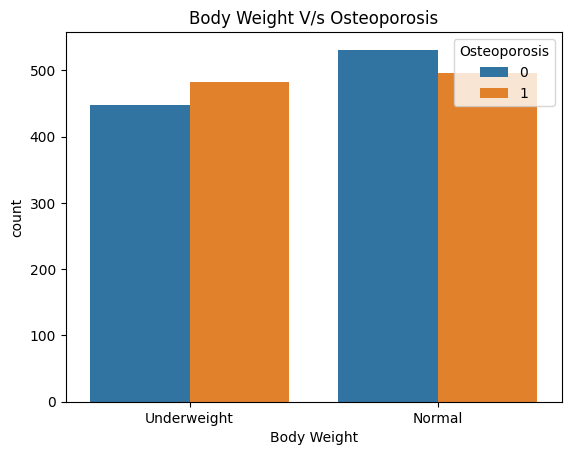

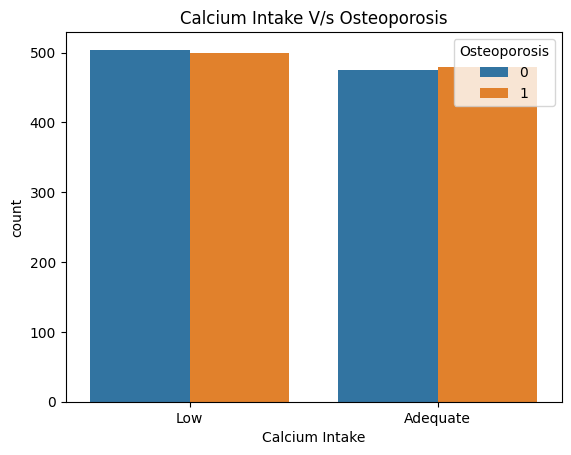

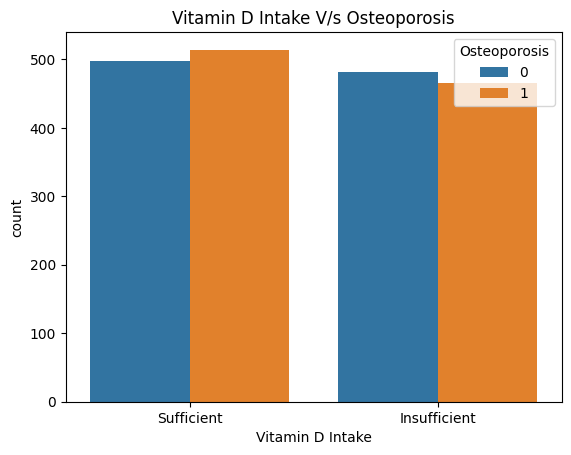

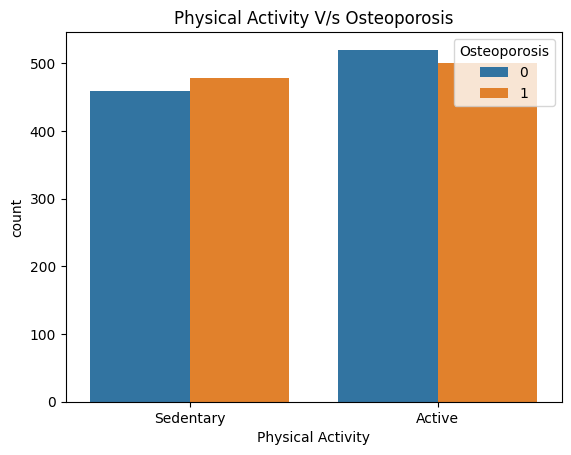

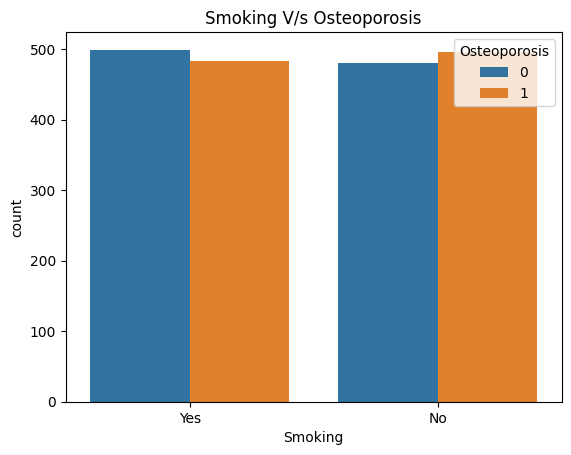

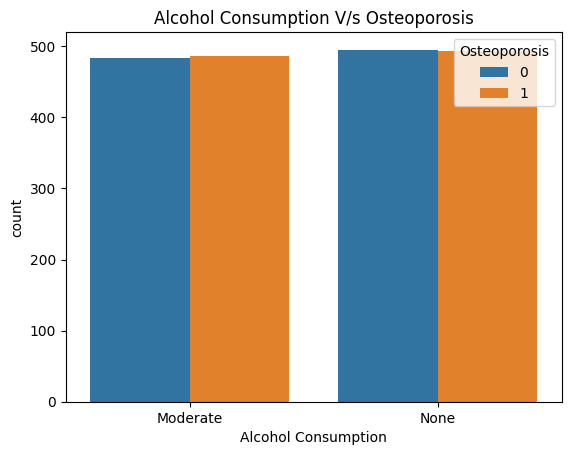

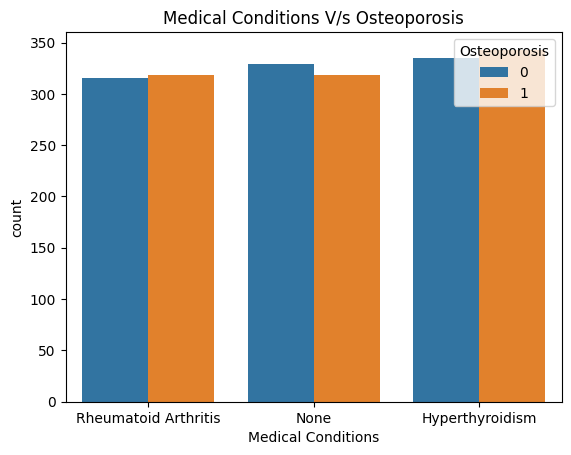

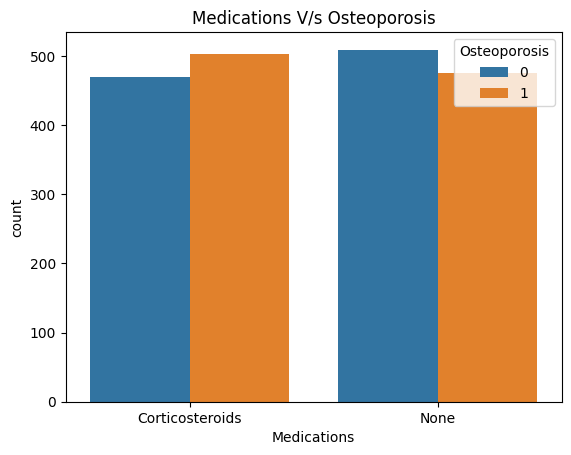

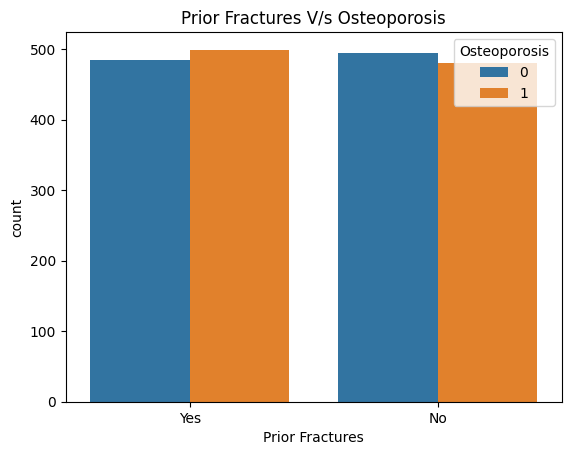

In [ ]:
for feature in cat_features:
  sns.countplot(x=feature, data=df, hue='Osteoporosis').set_title(f'{feature} V/s Osteoporosis')
  plt.show()

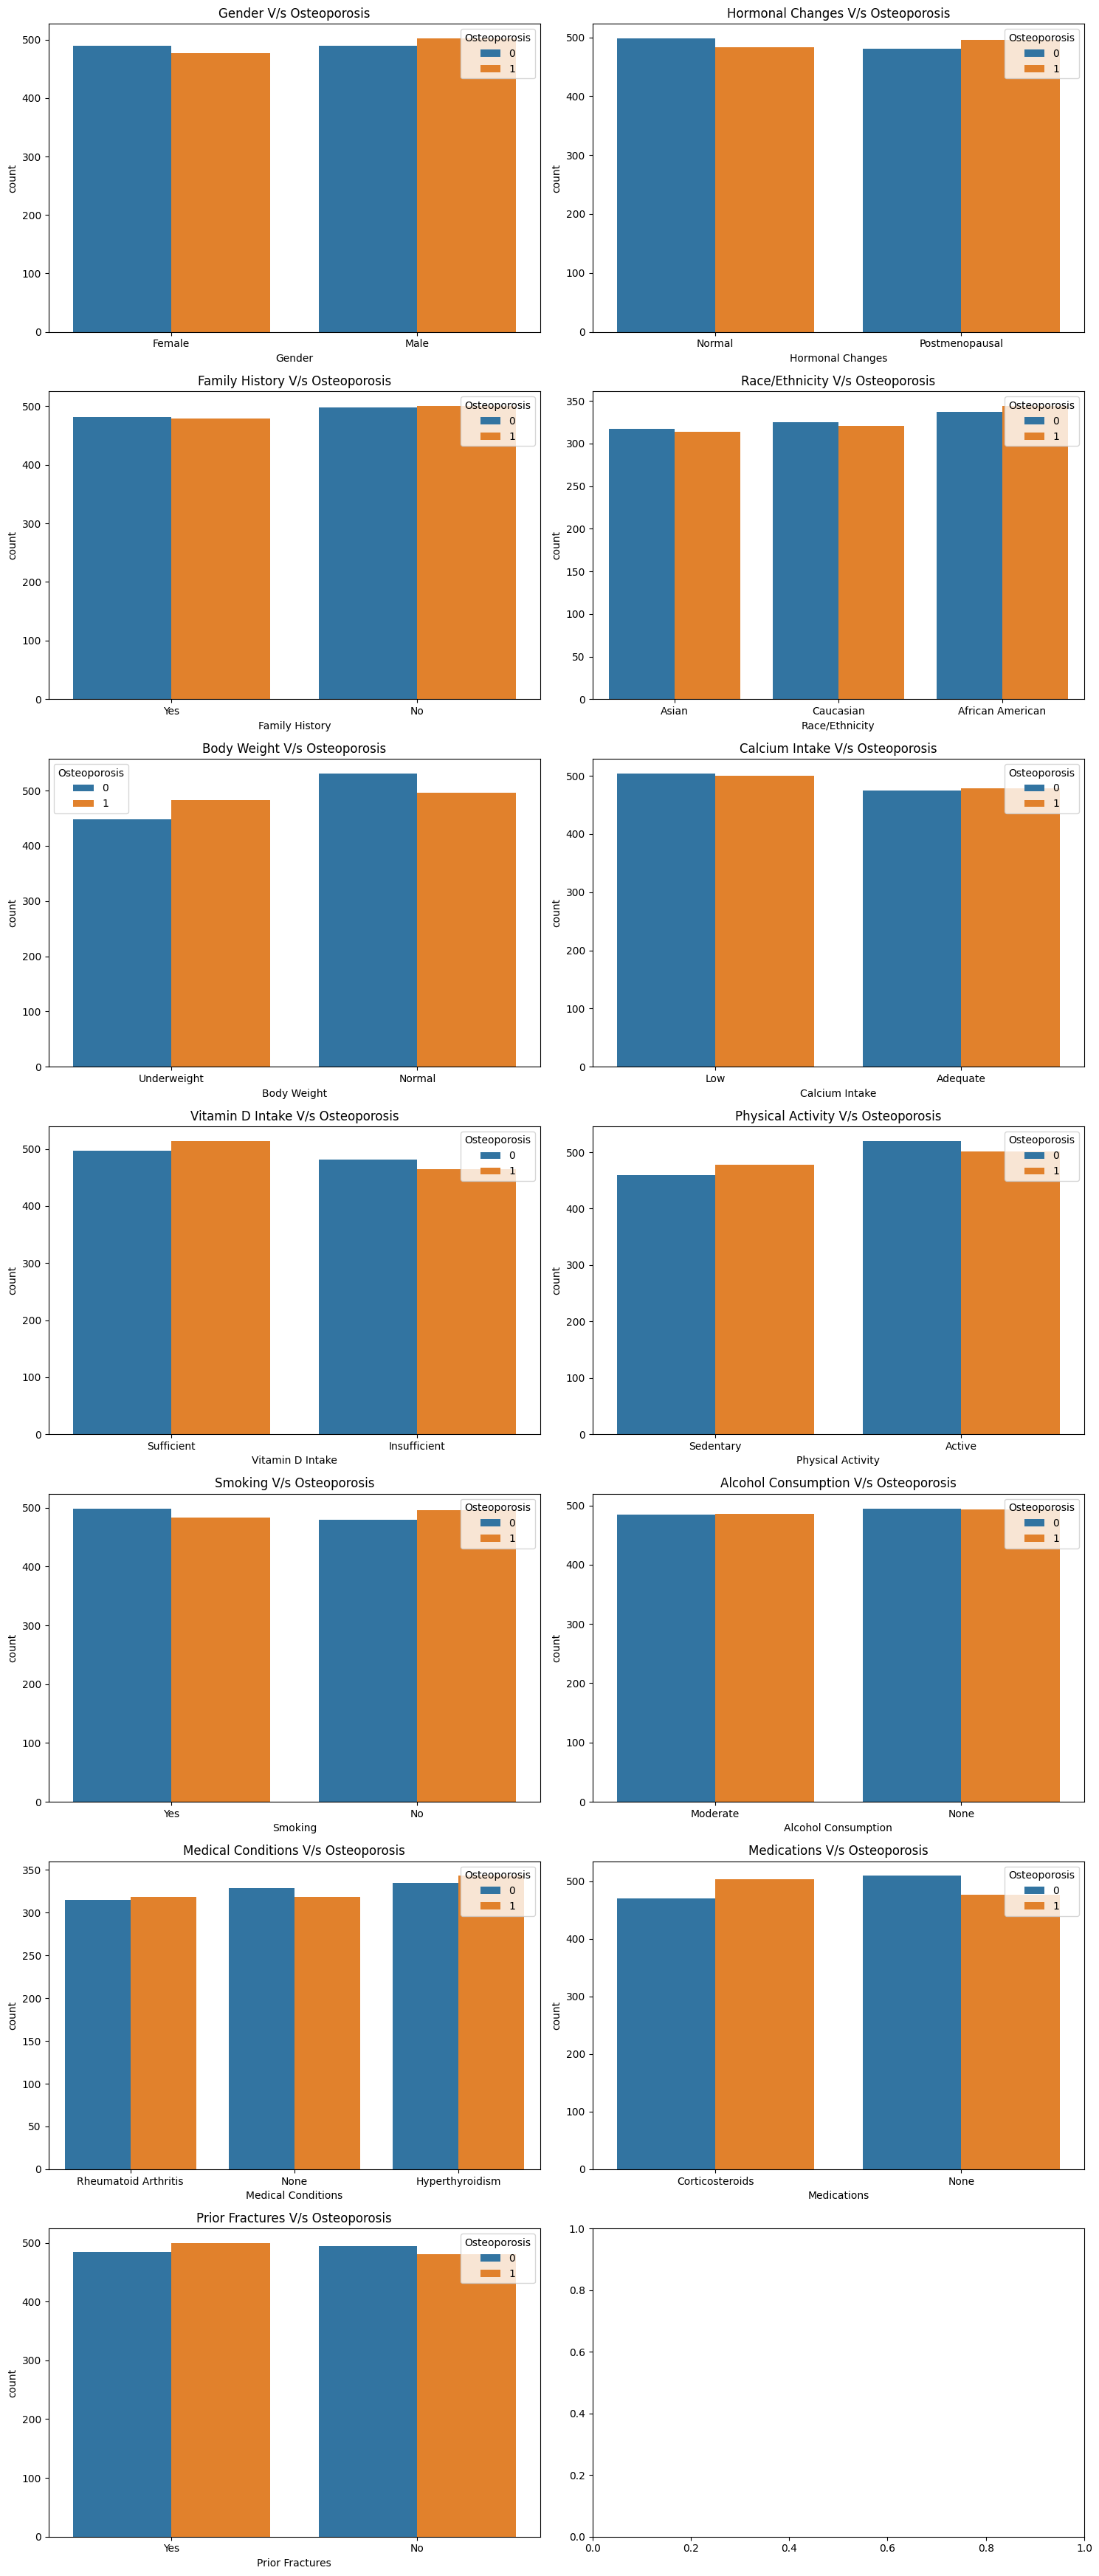

In [ ]:
import math

num_cols = len(cat_features)
num_rows = math.ceil(num_cols / 2)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))  # Create subplots

for i, feature in enumerate(cat_features):
    row = i // 2  # Calculate the row index
    col = i % 2  # Calculate the column index
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Get the current subplot

    sns.countplot(x=feature, data=df, hue='Osteoporosis', ax=ax)  # Create countplot in the subplot
    ax.set_title(f'{feature} V/s Osteoporosis')  # Set title for the subplot

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plot

# Feature Engineering

In [ ]:
# Label Encoding of Categorical variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in cat_features:
  df[feature] = le.fit_transform(df[feature])
  print(feature, ": ", df[feature].unique())

Gender :  [0 1]
Hormonal Changes :  [0 1]
Family History :  [1 0]
Race/Ethnicity :  [1 2 0]
Body Weight :  [1 0]
Calcium Intake :  [1 0]
Vitamin D Intake :  [1 0]
Physical Activity :  [1 0]
Smoking :  [1 0]
Alcohol Consumption :  [0 1]
Medical Conditions :  [2 1 0]
Medications :  [0 1]
Prior Fractures :  [1 0]


In [ ]:
df.head()

,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,69,0,0,1,1,1,1,1,1,1,0,2,0,1,1
1,32,0,0,1,1,1,1,1,1,0,1,1,1,1,1
2,89,0,1,0,2,0,0,1,0,0,0,0,0,0,1
3,78,0,0,0,2,1,0,0,1,1,1,2,0,0,1
4,38,1,1,1,0,0,1,1,0,1,1,2,1,1,1


<Axes: >

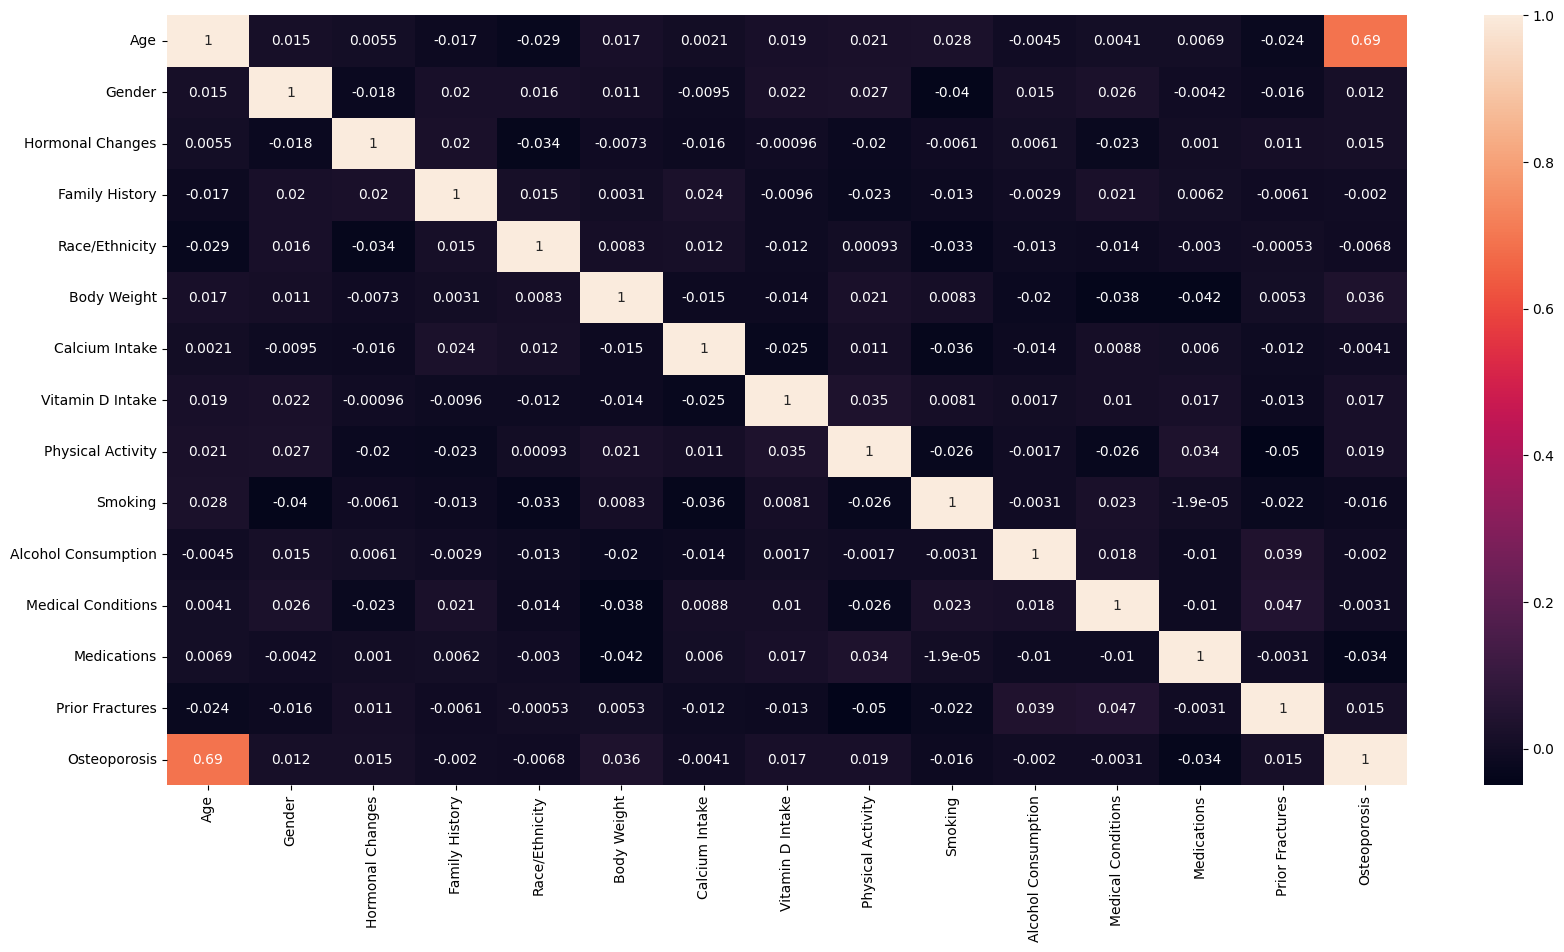

In [ ]:
# correlation
corr_matrix = df.corr()


plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

#### Observation
1. Age is hihgly correlated.
2. Most of the feautres are less correlated
3. BodyWeight, Gender, Medical Coditions are also correlated

### Train test split

In [ ]:
X = df.drop('Osteoporosis', axis =1)
y = df['Osteoporosis']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42 )

In [ ]:
print(f'Size of X_train : {X_train.shape}')
print(f'Size of X_test : {X_test.shape}')

print(f'Size of y_train : {y_train.shape}')
print(f'Size of y_test : {y_test.shape}')


Size of X_train : (1370, 14)
Size of X_test : (588, 14)
Size of y_train : (1370,)
Size of y_test : (588,)


# Model Training

1. Logisitic Regression
2. RF
3. SVM
4. DT

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Training Score: ", lr.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, y_pred))

Training Score:  0.8306569343065694
Testing SCore:  0.8214285714285714


##### Hyper parameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

#paramerts
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'penalty':['l1', 'l2','elasticnet', None],
              'solver':['liblinear','newton-cg'],
              'max_iter':[100,1000,2000, 5000],
              'random_state':[0,42, 101]}

grid = GridSearchCV(lr, param_grid,refit = True, verbose =3, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 2000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': [0, 42, 101],
                         'solver': ['liblinear', 'newton-cg']},
             verbose=3)

In [ ]:
#best parameters
grid.best_params_

{'C': 1,
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear'}

In [ ]:
lr = LogisticRegression(C= 1,
 max_iter= 100,
 penalty= 'l2',
 random_state= 0,
 solver= 'liblinear')

#fit
lr.fit(X_train,y_train)

#predict
lr_pred = lr.predict(X_test)


#accuracy
print("Training Score: ", lr.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, lr_pred))

Training Score:  0.8343065693430657
Testing SCore:  0.826530612244898


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

#accuracy
print("Training Score: ", dt.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, dt.predict(X_test)))

Training Score:  0.9985401459854014
Testing SCore:  0.8333333333333334


#### Hyperparameter Tuning

In [ ]:
#paramerts
param_grid = {'criterion':['gini', 'entropy'],
              'max_depth':[10,20,40,30],
              'min_samples_split':[2,4,5,10],
              'min_samples_leaf':[2,4,5,10],
              'random_state':[0,42, 101]}

grid = GridSearchCV(dt, param_grid,refit = True, verbose =3, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
                            max_depth=10,
                            min_samples_split = 2,
                            min_samples_leaf = 10,
                            random_state = 0)
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)
#accuracy
print("Training Score: ", dt.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, dt_pred))

Training Score:  0.9131386861313868
Testing SCore:  0.8928571428571429


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

#accuracy
print("Training Score: ", rf.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, rf.predict(X_test)))

Training Score:  0.9985401459854014
Testing SCore:  0.8486394557823129


### Hyper Parameter tuning

In [ ]:
# param_grid = {
#     'n_estimators':[10, 50, 100],
#     'criterion': ['gini', 'entropy'],
#     'max_depth' :[10,20,30],
#     'min_samples_split':[2,5,10],
#     'min_samples_leaf':[2,5,10],
#     'random_state':[0,42,101],
# }

# grid = GridSearchCV(rf, param_grid,refit = True, verbose =3, cv=5, n_jobs=-1)
# grid.fit(X_train, y_train)
# print('RandomForet Parameters: ', grid.best_params_)


In [ ]:
rf = RandomForestClassifier(
    n_estimators = 100,
    criterion='entropy',
    max_depth = 10,
    min_samples_leaf = 2,
    min_samples_split = 2,
    random_state = 42
)

rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)
#accuracy
print("Training Score: ", rf.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, rf_pred))

Training Score:  0.9386861313868613
Testing SCore:  0.8605442176870748


### Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

#accuracy
print("Training Score: ", svc.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, svc.predict(X_test)))

Training Score:  0.8474452554744526
Testing SCore:  0.8452380952380952


#### Hyper paramtere tuning

In [ ]:
param_grid = {
    'C':[ 1, 10, 100],
    'degree':[2,3,4,5],
    'gamma':['scale','auto'],
    'random_state':[0,42,101]
}
grid = GridSearchCV(svc, param_grid,refit = True, verbose =3, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print('BEST Parameters: ', grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
BEST Parameters:  {'C': 1, 'degree': 2, 'gamma': 'auto', 'random_state': 0}


In [ ]:
svc = SVC(
    C = 1,
    degree = 2,
    gamma = 'auto',
    random_state =0
)

svc.fit(X_train,y_train)

svc_pred = svc.predict(X_test)
#accuracy
print("Training Score: ", svc.score(X_train, y_train))

print("Testing SCore: ", accuracy_score(y_test, svc_pred))

Training Score:  0.8773722627737226
Testing SCore:  0.8707482993197279


# Model Evaluation

====TESTING ACCURACRY ===== 

Logistic Regression Testing Accuracy :  82.6530612244898
Decision Tree classifier Testing Accuracy :  89.28571428571429
Random Forest Classifier Testing Accuracy :  86.05442176870748
Support Vector Classifier Testing Accuracy :  87.07482993197279

====TRAINING ACCURACY====

Logistic Regression Trainnig Accuracy :  83.43065693430657
Decision Tree classifier Trainnig Accuracy :  91.31386861313868
Random Forest Classifier Trainnig Accuracy :  93.86861313868613
Support Vector Classifier Trainnig Accuracy :  87.73722627737226


## COnfusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'support Vector Classifier')

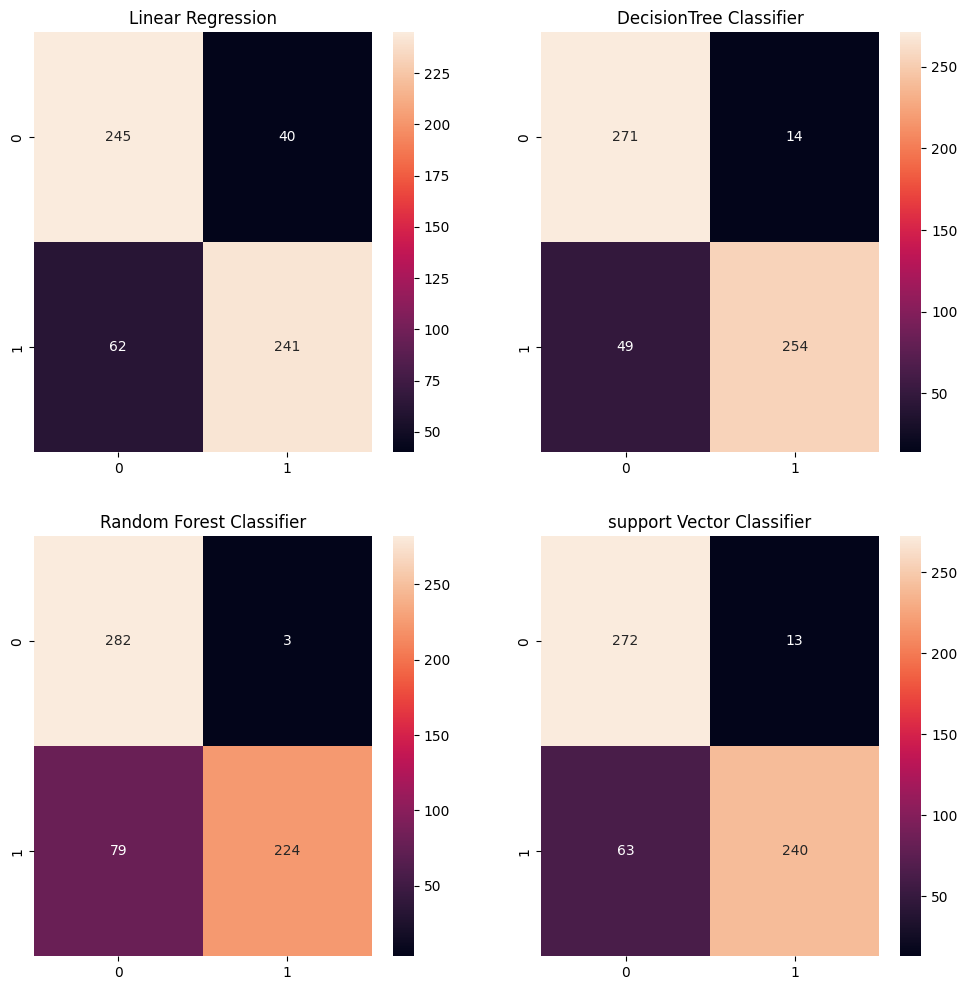

In [ ]:
fig, ax = plt.subplots(2,2, figsize =(12,12))

lr_cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_cm, annot=True,ax=ax[0,0], fmt='g').set_title("Linear Regression")

dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True,ax=ax[0,1], fmt='g').set_title("DecisionTree Classifier")

rf_cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cm, annot=True,ax=ax[1,0], fmt='g').set_title("Random Forest Classifier")

svc_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cm, annot=True,ax=ax[1,1], fmt='g').set_title("support Vector Classifier")


## Model Accuracy Plot

Text(0.5, 1.0, 'Model Accuracy')

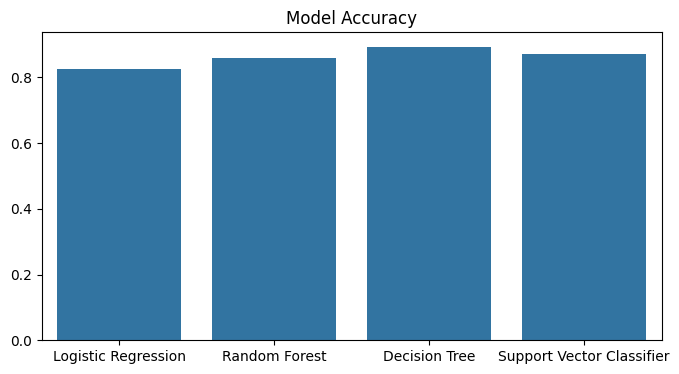

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier']
accuracy = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, rf_pred),
            accuracy_score(y_test, dt_pred), accuracy_score(y_test, svc_pred)]
plt.figure(figsize=(8,4))
sns.barplot(x=models, y=accuracy).set_title('Model Accuracy')

#### Observation

Decision Tree has highest Accuracy among all

In [ ]:
#model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support Vector Classifier']
mse = [mean_squared_error(y_test, lr_pred),
       mean_squared_error(y_test,rf_pred),
       mean_squared_error(y_test, dt_pred),
       mean_squared_error(y_test, svc_pred)]
mae = [mean_absolute_error(y_test, lr_pred),
       mean_absolute_error(y_test,rf_pred),
       mean_absolute_error(y_test, dt_pred),
       mean_absolute_error(y_test, svc_pred)]

rmse = [np.sqrt(mean_squared_error(y_test, lr_pred)),
       np.sqrt(mean_squared_error(y_test,rf_pred)),
       np.sqrt(mean_squared_error(y_test, dt_pred)),
       np.sqrt(mean_squared_error(y_test, svc_pred))]


r2Score = [r2_score(y_test, lr_pred),
       r2_score(y_test,rf_pred),
       r2_score(y_test, dt_pred),
       r2_score(y_test, svc_pred)]



Text(0.5, 1.0, 'R2 Score')

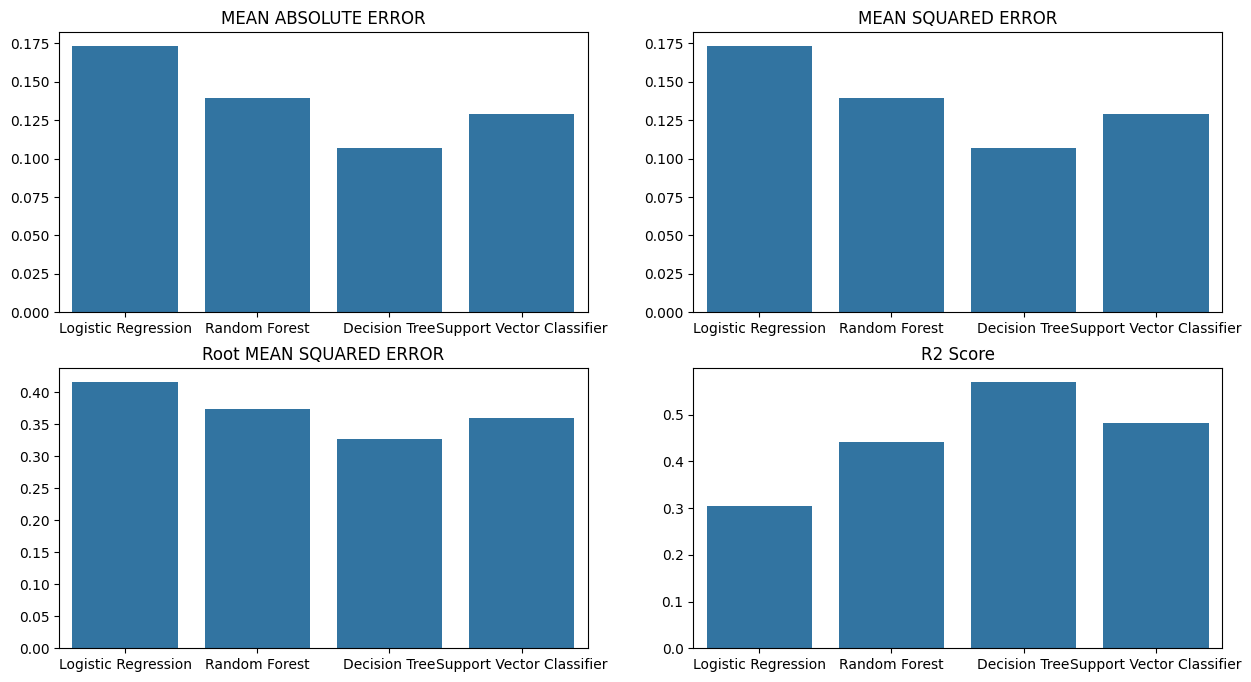

In [ ]:
fig, ax = plt.subplots(2,2, figsize =(15,8))

#create plot
sns.barplot(x = models, y = mae, ax = ax[0,0]).set_title("MEAN ABSOLUTE ERROR")
sns.barplot(x = models, y = mse, ax = ax[0,1]).set_title("MEAN SQUARED ERROR")
sns.barplot(x = models, y = rmse, ax = ax[1,0]).set_title("Root MEAN SQUARED ERROR")
sns.barplot(x = models, y = r2Score, ax = ax[1,1]).set_title("R2 Score")


In [ ]:
featureImp = list(dt.feature_importances_)
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = featureImp

features

,Features,Importance
0,Age,0.924320
1,Gender,0.001388
2,Hormonal Changes,0.007560
3,Family History,0.011689
4,Race/Ethnicity,0.010270
5,Body Weight,0.006486
6,Calcium Intake,0.002922
7,Vitamin D Intake,0.003512
8,Physical Activity,0.000907
9,Smoking,0.005059


In [ ]:
features.sort_values(by=['Importance'], ascending =True, inplace =True)
features

,Features,Importance
8,Physical Activity,0.000907
1,Gender,0.001388
6,Calcium Intake,0.002922
13,Prior Fractures,0.003264
7,Vitamin D Intake,0.003512
9,Smoking,0.005059
10,Alcohol Consumption,0.005175
12,Medications,0.005510
5,Body Weight,0.006486
2,Hormonal Changes,0.007560


In [ ]:
features = features.set_index('Features')


Text(0.5, 1.0, 'Important Features')

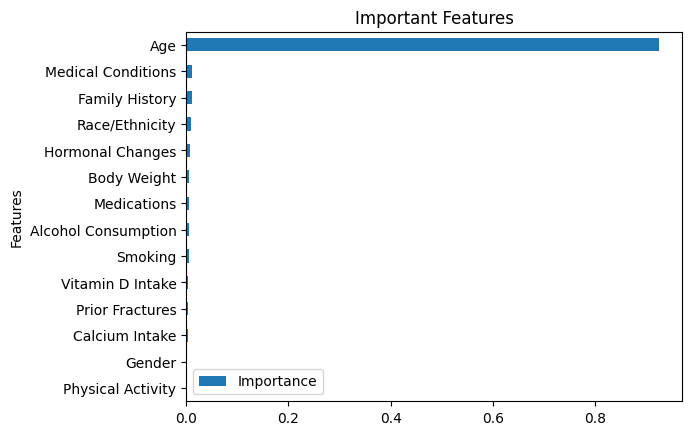

In [ ]:
features.plot(kind = 'barh').set_title('Important Features')

In [ ]:
lr.coef_[0]

array([ 0.14760861,  0.01665666,  0.10221567, -0.00605191, -0.00690438,
       -0.12193709, -0.04411637, -0.02112862,  0.05599176, -0.44768551,
       -0.05181075, -0.14783825, -0.3619153 ,  0.01303258])

Text(0.5, 1.0, 'Important Features of Logistic Regresion')

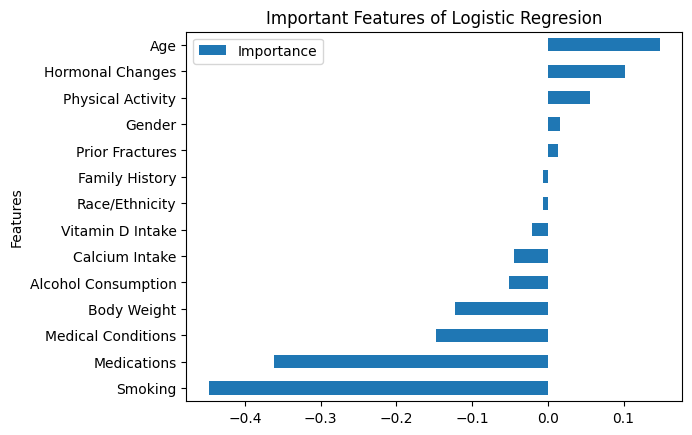

In [ ]:
featureImp = list(lr.coef_[0])
labels = list(X.columns)
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = featureImp
features.sort_values(by=['Importance'], ascending =True, inplace =True)
features = features.set_index('Features')
features.plot(kind = 'barh').set_title('Important Features of Logistic Regresion')
